# 第3章 最尤推定法：確率を用いた推定理論

## 「03-ml_gauss.py」の解説

ITエンジニアための機械学習理論入門「第3章 最尤推定法:確率を用いた推定理論」で使用しているサンプルコード「03-ml_gauss.py」の解説です。

※ 解説用にコードの内容は少し変更しています。

はじめに必要なモジュールをインポートしておきます。

関数 normal は、正規分布に従う乱数を生成するために利用します。関数 norm は、正規分布の確率密度関数（PDF）を提供します。

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal
from scipy.stats import norm

平均0、標準偏差0.1の正規分布から datapoints で指定された個数のデータを生成して、最尤推定法で平均と標準偏差を推定します。

In [0]:
def show_mle(subplot, datapoints):
    ds = normal(loc=0, scale=1, size=datapoints)
    
    mu = np.mean(ds)                # 平均の推定値
    sigma = np.sqrt(np.var(ds))     # 標準偏差の推定値

    subplot.set_title("N=%d" % datapoints)
    
    # 真の曲線を表示
    linex = np.arange(-10,10.1,0.1)
    orig = norm(loc=0, scale=1)
    subplot.plot(linex, orig.pdf(linex), color='green', linestyle='--')
    
    # 推定した曲線を表示
    est = norm(loc=mu, scale=sigma)
    label = "Sigma=%.2f" % sigma
    subplot.plot(linex, est.pdf(linex), color='red', label=label)
    subplot.legend(loc=1)
    
    # サンプルの表示
    subplot.scatter(ds, orig.pdf(ds), marker='o', color='blue')
    subplot.set_xlim(-4,4)
    subplot.set_ylim(0)

データ数を変化させながら、結果をグラフ表示していきます。

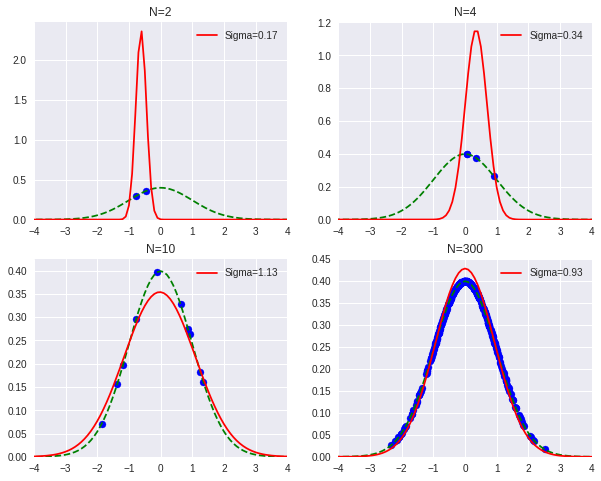

In [3]:
fig = plt.figure(figsize=(10, 8))
for c, datapoints in enumerate([2,4,10,300]):
        subplot = fig.add_subplot(2,2,c+1)
        show_mle(subplot, datapoints)

データ数が増えるにしたがって、推定値が真の母数に近づくことがわかります。

また、データ数が少ない場合は、分散が真の母数よりも小さく推定されていることがわかります。